In [3]:
import pandas as pd
df=pd.read_csv("water_potability.csv")

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Approach followed

The process begins with loading the dataset, followed by checking for missing values. Then, the data is divided into features and target variable, and then separated into training and testing sets. Steps of Preprocessing are defined for numerical features, including imputation and scaling, and a preprocessing pipeline is created. A RandomForestClassifier model pipeline is then defined. Hyperparameters are specified for optimization, and GridSearchCV is used to do this. The best parameters found and the best accuracy score on the validation data are then printed. Finally, the model is used to predict on the test set, and its accuracy is evaluated, with a classification report displayed.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [21]:
#we will gonna remove all the rows where the water is not potabil to drink
data_filtered = df[df['Potability'] == 1]
# Drop rows with missing values
data_filtered = data_filtered.dropna()

data_filtered.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1


In [23]:
# Split the data into features (X) and target variable (y) for regression
X_reg = data_filtered.drop("Potability", axis=1)
y_reg = data_filtered["Potability"]
data_filtered.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1


In [25]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2,
                                                                    random_state=42)

In [26]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 250 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               811 non-null    float64
 1   Hardness         811 non-null    float64
 2   Solids           811 non-null    float64
 3   Chloramines      811 non-null    float64
 4   Sulfate          811 non-null    float64
 5   Conductivity     811 non-null    float64
 6   Organic_carbon   811 non-null    float64
 7   Trihalomethanes  811 non-null    float64
 8   Turbidity        811 non-null    float64
 9   Potability       811 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 69.7 KB


In [27]:
# Calculate the percentage of "Potability" values
potability_percentage = data_filtered["Potability"].mean() * 100
print("Percentage of Potability:", potability_percentage)

# Calculate the percentage of non-zero values in each feature column
non_zero_percentages = (data_filtered.iloc[:, :-1] != 0).mean() * 100
print("\nPercentage of non-zero values in each feature column:")
print(non_zero_percentages)

# Set thresholds for prediction
potability_threshold = 50  # Potability percentage threshold
non_zero_threshold = 50  # Non-zero percentage threshold

# Make predictions based on the thresholds
predictions = []
for index, row in data_filtered.iterrows():
    if potability_percentage > potability_threshold:
        prediction = 1  # Predict potable
    elif (row[:-1] != 0).sum() < non_zero_threshold:
        prediction = 0  # Predict not potable
    else:
        prediction = row["Potability"]  # Predict based on majority class
    predictions.append(prediction)

# Calculate accuracy
accuracy = (predictions == data_filtered["Potability"]).mean() * 100
print("\nAccuracy:", accuracy)


Percentage of Potability: 100.0

Percentage of non-zero values in each feature column:
ph                 100.0
Hardness           100.0
Solids             100.0
Chloramines        100.0
Sulfate            100.0
Conductivity       100.0
Organic_carbon     100.0
Trihalomethanes    100.0
Turbidity          100.0
dtype: float64

Accuracy: 100.0


In [30]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

numeric_features = X_reg.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create preprocessing pipeline
preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])


In [31]:
# Define the regression model
model_reg = Pipeline(steps=[('preprocessor', preprocessor_reg),
                            ('regressor', RandomForestRegressor(random_state=42))])

# Define hyperparameters for tuning
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_reg = GridSearchCV(model_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_reg, y_train_reg)

# Get best parameters and best score
print("Best parameters found:", grid_search_reg.best_params_)
print("Best negative mean squared error score on validation data:", grid_search_reg.best_score_)


Best parameters found: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best negative mean squared error score on validation data: 0.0


In [32]:
# Predict on test set
y_pred_reg = grid_search_reg.predict(X_test_reg)

# Evaluate the model
print("\nMean Squared Error on test set:", mean_squared_error(y_test_reg, y_pred_reg))
print("R-squared on test set:", r2_score(y_test_reg, y_pred_reg))


Mean Squared Error on test set: 0.0
R-squared on test set: 1.0


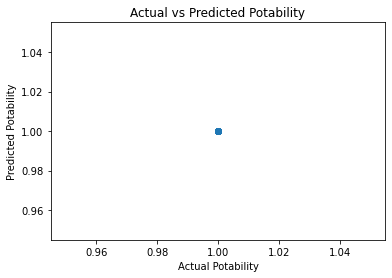

In [33]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.xlabel('Actual Potability')
plt.ylabel('Predicted Potability')
plt.title('Actual vs Predicted Potability')
plt.show()


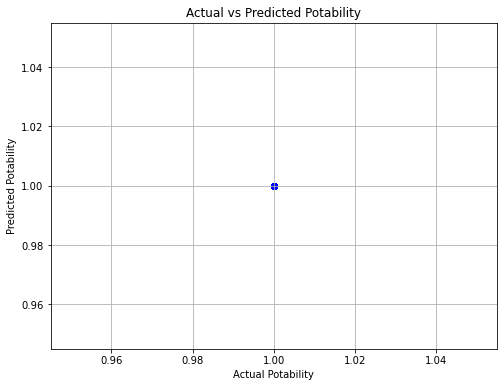

In [34]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, color='blue', alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', 
         linestyle='--')
plt.xlabel('Actual Potability')
plt.ylabel('Predicted Potability')
plt.title('Actual vs Predicted Potability')
plt.grid(True)
plt.show()


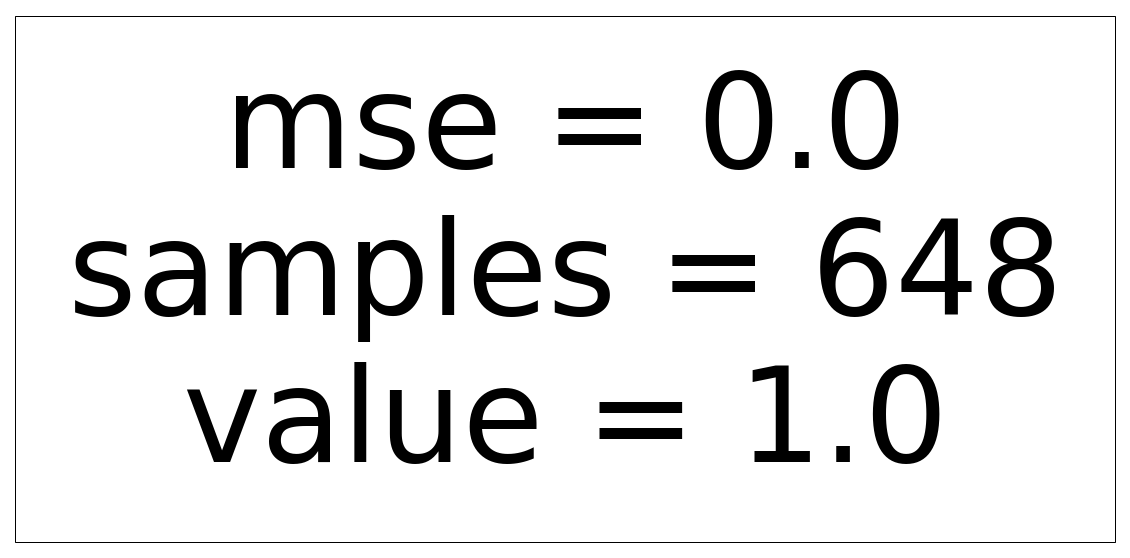

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Définir le modèle de l'arbre de décision
model_tree = DecisionTreeRegressor(random_state=42)

# Entraîner le modèle
model_tree.fit(X_train_reg, y_train_reg)

# Visualiser l'arbre de décision
plt.figure(figsize=(20, 10))
plot_tree(model_tree, filled=True, feature_names=X_reg.columns)
plt.show()


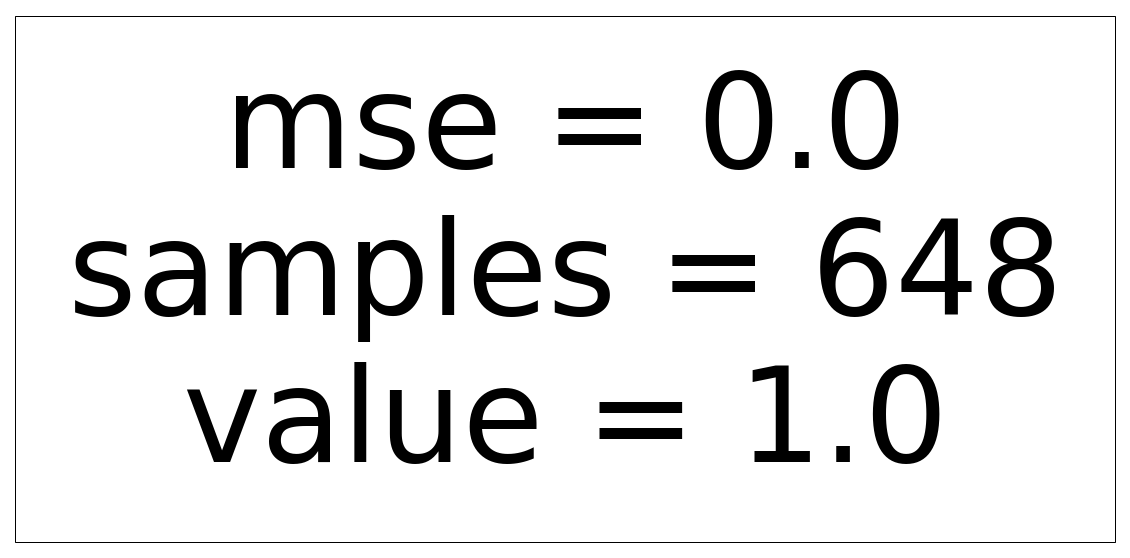

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Définir le modèle de l'arbre de décision
model_tree = DecisionTreeRegressor(random_state=42)

# Entraîner le modèle
model_tree.fit(X_train_reg, y_train_reg)

# Visualiser l'arbre de décision
plt.figure(figsize=(20, 10))
plot_tree(model_tree, filled=True, feature_names=X_reg.columns)
plt.show()
